In [1]:
from PIL import Image
import PIL
import numpy as np
import os
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
import math
from math import log
from tqdm import tqdm
from tensorflow import keras
from keras.models import load_model

Get Image matrix

In [2]:
def getImageMatrix(imagename):

    im = Image.open(imagename).convert('L')
    im = im.resize((256,256))
    image_matrix = np.array(im)

    return image_matrix

CNN

In [3]:
def cnn(imagename,model):
  #load image
  im = Image.open(imagename)
  im = im.convert('L')
  im = np.array(im.resize((224,224)))
  im = im.reshape([1,224,224])
  im = im/np.max(im)

  #load model
  model = load_model(model)
  features = model.predict(im)
  return features

Binary to Report

In [4]:
def dec(bitsequence):
    decimal = 0
    for bit in bitsequence:
        decimal = decimal * 2 + int(bit)
    return decimal

Henon map

In [5]:
def genHenonmap(imagename,model):
    key = cnn(imagename,model)

    x = key[0][0]
    y = key[0][1]

    #dim = 256

    sequenceSize = ((256 * 256) + 512) * 8              #Total Number of bitSequence produced
    bitSequence = np.empty((0,0),int)                           #Each bitSequence contains 8 bits
    byteArray = np.empty((0,0),int)                           #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = np.empty((0,0),int)                        #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)

    for i in range(sequenceSize):
            xN = 1 - 1.4 * x ** 2 + y
            yN = 0.3 * x

            x = xN
            y = yN


            if xN <= 0:
                bit = 0
            else:
                bit = 1

            try:
                bitSequence.append(bit)
            except:
                bitSequence = [bit]


            if i % 8 == 7:
                decimal = dec(bitSequence)

                try:
                    byteArray.append(decimal)
                except:
                    byteArray = [decimal]
                bitSequence = []

            byteArraySize = 256 * 8
            if i % byteArraySize == byteArraySize-1:
                try:
                    TImageMatrix.append(byteArray)
                except:
                    TImageMatrix = [byteArray]
                byteArray = []

    TImageMatrix = TImageMatrix[2:]
    return TImageMatrix

Hilbert curve

In [6]:
def hilbertCurve(order):
  A = np.empty((0,0),int)
  B = np.empty((0,0),int)
  C = np.empty((0,0),int)
  D = np.empty((0,0),int)
  north = [0,1]
  east = [1,0]
  south = [0,-1]
  west = [-1,0]
  limit=((2**order)*(2**order))-1
  #print("LIMIT :",limit)
  AA=np.array((limit,2))
  BB=np.array((limit,2))
  CC=np.array((limit,2))
  DD=np.array((limit,2))
  for i in range(1,int(order+1),1):
    if i==1:
      AA1=np.append(B,north)
      AA2=np.append(A,east)
      AA3=np.append(A,south)
      AA=np.stack((AA1,AA2,AA3))
      #print("AA is",AA)
      BB1=np.append(A,east)
      BB2=np.append(B,north)
      BB3=np.append(B,west)
      BB=np.stack((BB1,BB2,BB3))
      CC1=np.append(D,west)
      CC2=np.append(C,south)
      CC3=np.append(C,east)
      CC=np.stack((CC1,CC2,CC3))
      DD1=np.append(C,south)
      DD2=np.append(D,west)
      DD3=np.append(D,north)
      DD=np.stack((DD1,DD2,DD3))
      A=np.append(A,AA)
      B=np.append(B,BB)
      C=np.append(C,CC)
      D=np.append(D,DD)
      #s=int(A.size/2)
      #print(s)
      #A=np.reshape(A,(s,2))
      #print("A is",A)
    else:
      AA1=np.append(B,north)
      AA2=np.append(A,east)
      AA3=np.append(A,south)
      AA=np.stack((AA1,AA2,AA3))
      AA=np.append(AA,C)
      #print("AA is",AA)
      BB1=np.append(A,east)
      BB2=np.append(B,north)
      BB3=np.append(B,west)
      BB=np.stack((BB1,BB2,BB3))
      BB=np.append(BB,D)
      CC1=np.append(D,west)
      CC2=np.append(C,south)
      CC3=np.append(C,east)
      CC=np.stack((CC1,CC2,CC3))
      CC=np.append(CC,A)
      DD1=np.append(C,south)
      DD2=np.append(D,west)
      DD3=np.append(D,north)
      DD=np.stack((DD1,DD2,DD3))
      DD=np.append(DD,B)
      A=[]
      B=[]
      C=[]
      D=[]
      A=np.append(A,AA)
      B=np.append(B,BB)
      C=np.append(C,CC)
      D=np.append(D,DD)
      s=int(A.size/2)
      #print(s)
      A=np.reshape(A,(s,2))
      #print("A is",A.shape)
  s=int(A.size/2)
  #print(s)
  A=np.reshape(A,(s,2))
  res=np.array([0,0])
  res=(np.append(res,np.cumsum(A, axis=0)))
  #print(res)
  s1=int(res.size/2)
  res=np.reshape(res,(s1,2))
  #print(res)
  return res

Scrambling

In [7]:
def scrambling(imagename):

  im = getImageMatrix(imagename)

  order = 8
  mod_im = np.empty((0,0),int)
  x = np.empty((0,0),int)
  y = np.empty((0,0),int)

  scramble_out = hilbertCurve(order)

  for i in range(len(scramble_out)):
    x = np.append(x,int(scramble_out[i][0]))
    y = np.append(y,int(scramble_out[i][1]))

    mod_im = np.append(mod_im,im[x[i]][y[i]])

  #mod_im = np.asarray(mod_im)
  mod_im = mod_im.reshape([256,256])
  return mod_im





Bit Shifter

In [8]:
def shifter(decimal):
  a = (format(decimal,'08b'))  #decimal to binary

  lst = []
  lst[:0] = a              #binary to list

  for i in range(len(lst)):
    if i%2 == 0:
      temp = lst[i]
      lst[i] = lst[i+1]
      lst[i+1] = temp      #bit shifted

  st = ""
  for i in range(len(lst)):
    st += lst[i]           #list to string
  deci = int(st,2)         #string to decimal

  return deci

Encryption

In [9]:
def encryption(imagename,model):
    imageMatrix = scrambling(imagename)
    timageMatrix = genHenonmap(imagename,model)

    row = []
    resultantMatrix = []
    dim = 256

    temp = 0

    for i in range(dim):
        for j in range(dim):


          op = ((imageMatrix[i][j])^(timageMatrix[i][j]))^(temp)
          temp = op

          new_op = shifter(op)


          row.append(new_op)

          if (j == 255):
            resultantMatrix.append(row)
            row = []
    return resultantMatrix



# New Section

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
model_name = "/content/drive/MyDrive/PROJECT DETAILS/Model/project_model.h5"
imagename = "/content/drive/MyDrive/PROJECT DETAILS/Samples/image/fruit.jpeg"

In [12]:
en_matrix = encryption(imagename,model_name)

1/1 [==============================] - 8s 8s/step


In [13]:
def matrixToImage(matrix):
  matrix = np.asarray(matrix)
  image = Image.fromarray((matrix * 255).astype(np.uint8))
  return image


In [14]:
print(len(en_matrix))
print(en_matrix)

256
[[12, 235, 56, 157, 154, 140, 111, 204, 100, 112, 126, 88, 146, 97, 117, 153, 234, 163, 155, 13, 231, 43, 153, 77, 48, 139, 23, 197, 243, 222, 173, 212, 134, 144, 89, 156, 119, 217, 55, 129, 57, 115, 13, 78, 179, 120, 160, 93, 152, 147, 234, 100, 142, 255, 138, 113, 127, 162, 127, 96, 64, 234, 232, 236, 81, 208, 102, 46, 229, 59, 199, 8, 34, 130, 110, 204, 30, 249, 63, 137, 197, 127, 22, 167, 76, 18, 74, 231, 12, 103, 115, 187, 123, 224, 169, 29, 246, 68, 121, 253, 252, 246, 29, 209, 204, 190, 78, 178, 72, 131, 220, 193, 129, 171, 199, 153, 240, 5, 97, 73, 135, 108, 254, 38, 101, 183, 14, 15, 84, 33, 38, 49, 37, 160, 94, 170, 78, 110, 51, 206, 23, 146, 11, 248, 226, 233, 145, 195, 49, 43, 81, 14, 117, 100, 50, 35, 33, 118, 39, 124, 134, 223, 79, 143, 153, 193, 184, 171, 237, 189, 197, 147, 128, 153, 207, 223, 167, 247, 166, 222, 162, 250, 5, 240, 179, 239, 153, 159, 142, 149, 181, 68, 130, 159, 103, 9, 255, 6, 201, 219, 167, 87, 129, 30, 98, 17, 22, 53, 98, 157, 207, 214, 44, 43, 7

In [15]:
en_im = matrixToImage(en_matrix)

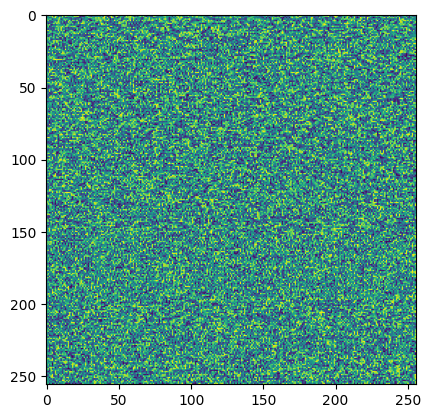

In [16]:
plt.imshow(en_im)

In [17]:
en_m = np.asarray(en_im)
en_m

array([[244,  21, 200, ..., 244, 217,   3],
       [ 52, 130, 213, ...,  77,  54, 100],
       [111, 152,  71, ..., 189, 163, 118],
       ...,
       [ 69, 176,  65, ...,  77, 239, 116],
       [185, 131, 123, ..., 145,  68, 233],
       [ 98, 198,  17, ..., 162,  33, 208]], dtype=uint8)

In [18]:
en_im = en_im.convert("RGB")
en_im = en_im.save("encrypted_fruit_F.jpeg")

In [19]:
image = Image.open(imagename)
image = image.resize((256,256))
image = image.convert("RGB")
image = image.save("fruit_image_F.jpeg")